# **Pre-Processing Steps**

**Move to the directory of the notebook - Only for Google Colab**

In [1]:
cd /content/drive/MyDrive/Colab Notebooks/rgb_hands

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/rgb_hands'
/content


**Load Libraries**

In [2]:
import pandas as pd
import cv2
import numpy as np
import mediapipe as mp
from cv2.ximgproc import guidedFilter
import matplotlib.pyplot as plt

In [3]:
img_path = "/content/drive/MyDrive/Colab Notebooks/rgb_hand/hands_comb/197_IMG_4698.jpg"

## **Remove Background**

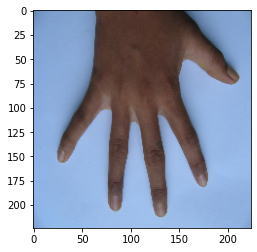

In [4]:
mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

# Read image
image = cv2.imread(img_path)

# Resize to 244x244
image = cv2.resize(image, (224, 224))

# Convert image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

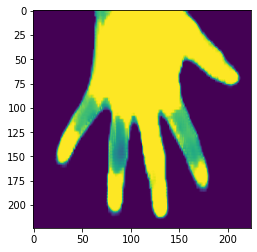

In [5]:
# Get the segmentation mask
results = selfie_segmentation.process(image)

# Extract the segmentation mask
mask = results.segmentation_mask

plt.imshow(mask)

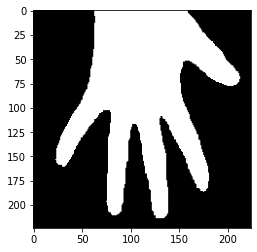

In [6]:
# Create a binary mask where foreground is white and the background is black
mask = np.stack((mask,)*3, axis=-1)
mask = np.where(mask > 0.1, 255, 0).astype('uint8')

plt.imshow(mask)

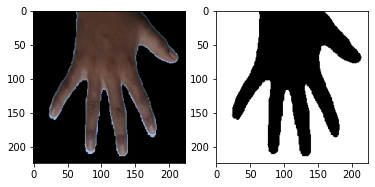

In [7]:
# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Create a white background image of the same size as the original image
background = np.ones_like(image)*255

# Apply the mask to the original image to get foreground
foreground = cv2.bitwise_and(image, mask)

# Apply the inverted mask to the white background to get background
background = cv2.bitwise_and(background, mask_inv)

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(foreground)
axs[1].imshow(background)

# Show the plot
plt.show()

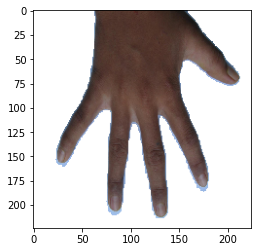

In [13]:
# Combine the foreground and background to get the final result
result = cv2.add(foreground, background)

plt.imshow(result)

## **Get High Detailed BGR Image**

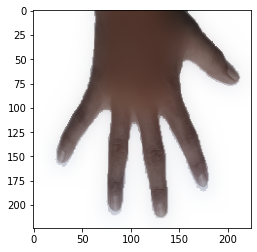

In [14]:
# Normalise the image
norm = np.array(result, dtype=np.float32) / 255.0

# Apply the guided filter to get a smoothed - low frequency image
low_img = guidedFilter(norm, norm, 10, 0.05)

plt.imshow(low_img)

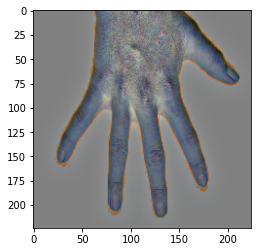

In [15]:
# Convert the image to BGR
bgr = cv2.cvtColor(low_img, cv2.COLOR_RGB2BGR)

# Divide normalised image to low frequency image
high_bgr = np.uint8(cv2.normalize(np.divide(cv2.cvtColor(norm, cv2.COLOR_RGB2BGR), bgr), None, 0, 255, cv2.NORM_MINMAX))

plt.imshow(high_bgr)